In [1]:
### We're building a logistic Regression model in order to determine the Heart failure instances increasing with time and changing Habits

In [2]:
### importing necessary libraries in order to analyse the data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
heart_failure = pd.read_excel('heart_failure_clinical_records.xlsx') # fetching the Database

In [5]:
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0,0.0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0,0.0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0,0.0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0,0.0


In [6]:
# Analysis of Data,checking whether if there is any null value present, infomration about the variables like int, float object etc

In [7]:
heart_failure.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    float64
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    float64
 10  smoking                   299 non-null    float64
 11  time                      299 non-null    float64
 12  DEATH_EVENT               299 non-null    float64
dtypes: float64(13)
memory usage: 30.5 KB


In [10]:
# Checking the description of variables given in the table

In [11]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [12]:
heart_failure.shape

(299, 13)

In [13]:
# Creating the charts inorder to get the information about multiple parameter

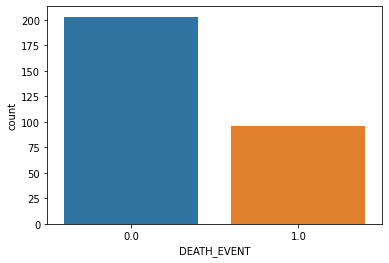

In [14]:
sns.countplot('DEATH_EVENT', data = heart_failure) 
plt.show()

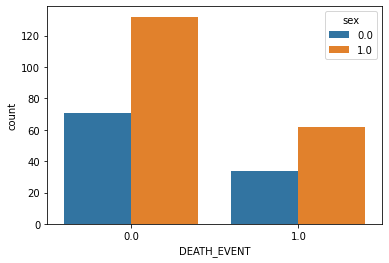

In [15]:
sns.countplot('DEATH_EVENT', hue='sex', data = heart_failure)
plt.show()

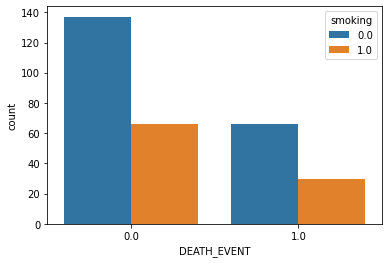

In [16]:
sns.countplot('DEATH_EVENT', hue='smoking', data = heart_failure)
plt.show()

<AxesSubplot:ylabel='Frequency'>

<Figure size 3600x2160 with 0 Axes>

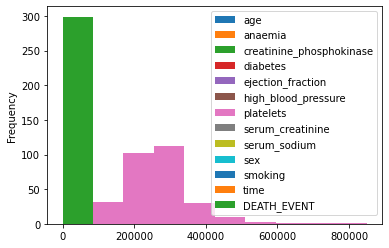

In [17]:
plt.figure(figsize=(50,30))
heart_failure.plot.hist()

<AxesSubplot:ylabel='Frequency'>

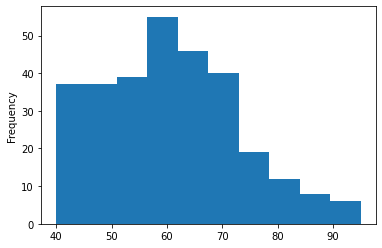

In [18]:
heart_failure["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

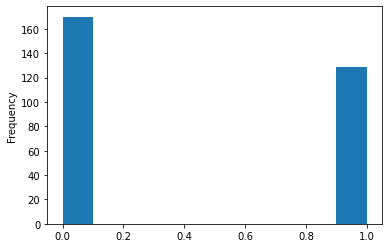

In [19]:
heart_failure["anaemia"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

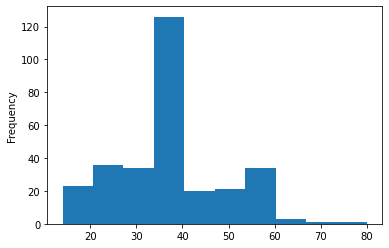

In [20]:
heart_failure["ejection_fraction"].plot.hist()

<AxesSubplot:xlabel='ejection_fraction', ylabel='serum_sodium'>

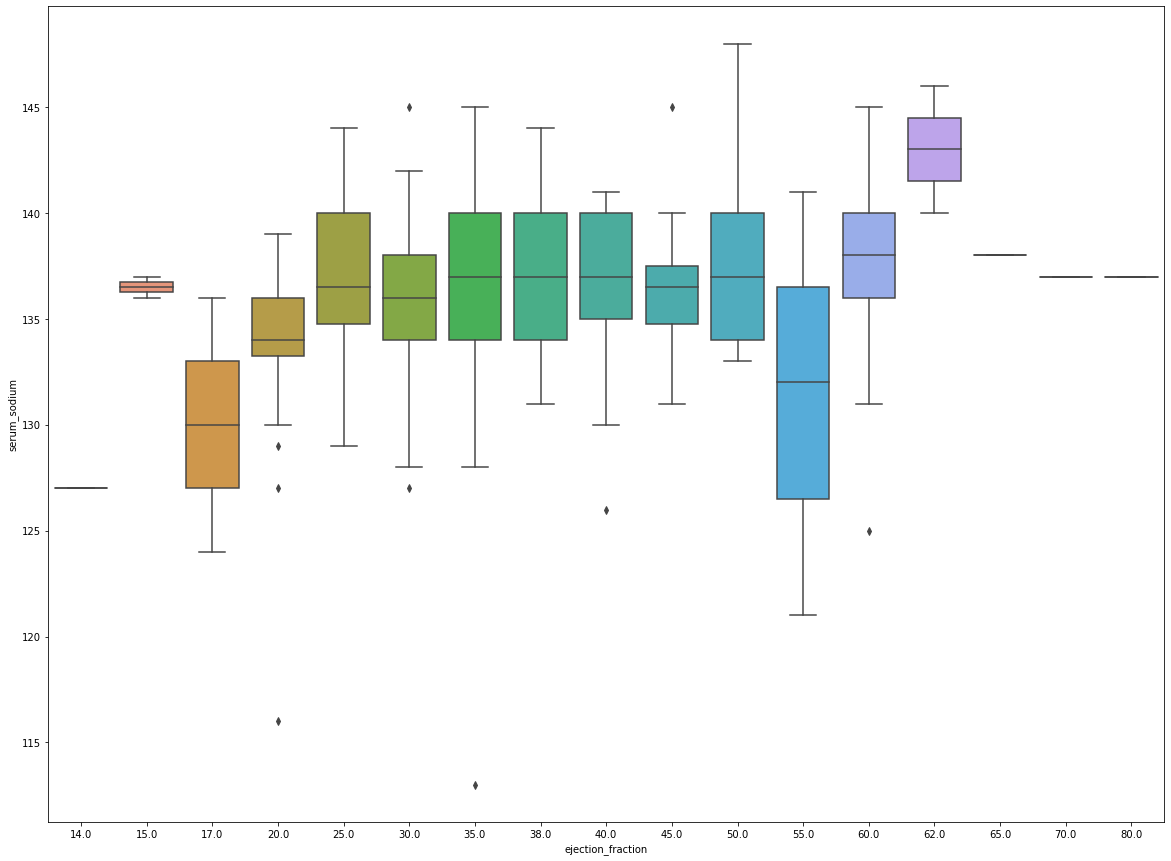

In [21]:
plt.figure(figsize=(20,15))
sns.boxplot(x='ejection_fraction', y = 'serum_sodium', data = heart_failure)

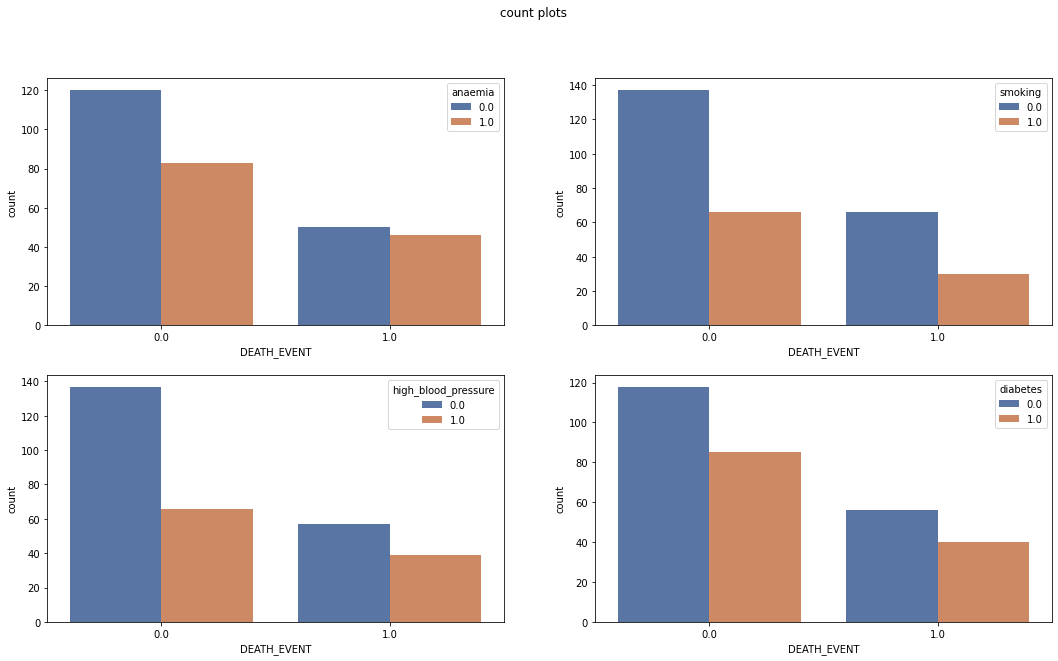

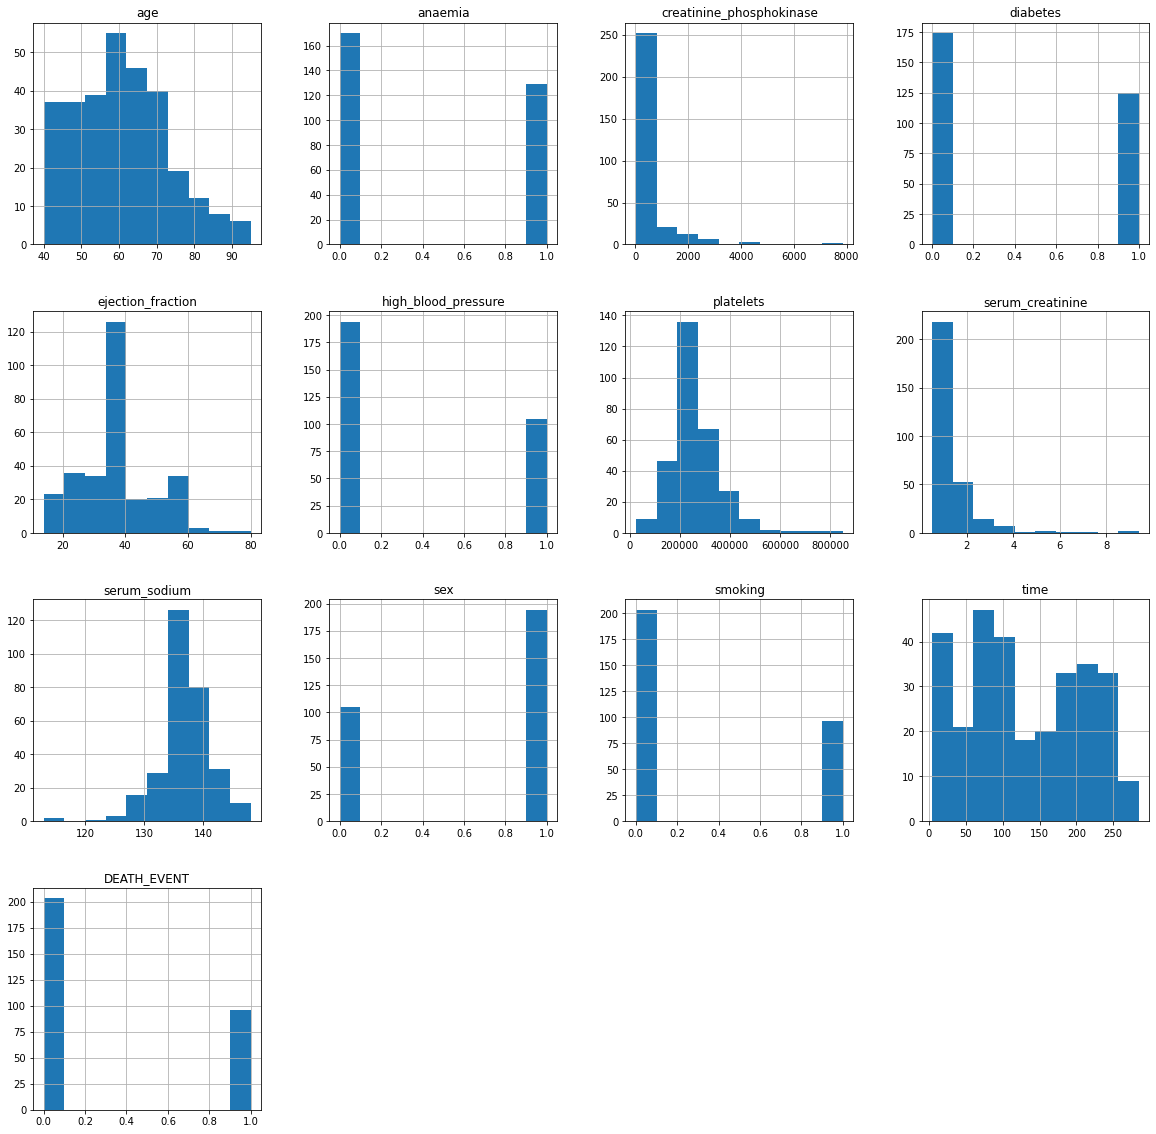

In [22]:
fig, axes = plt.subplots(2,2,figsize=(18,10))
fig.suptitle('count plots')
sns.countplot(ax=axes[0,0], x='DEATH_EVENT', hue='anaemia',data=heart_failure, palette='deep')
sns.countplot(ax=axes[0,1], x='DEATH_EVENT', hue='smoking',data=heart_failure, palette='deep')
sns.countplot(ax=axes[1,0], x='DEATH_EVENT', hue='high_blood_pressure',data=heart_failure, palette='deep')
sns.countplot(ax=axes[1,1], x='DEATH_EVENT', hue='diabetes',data=heart_failure, palette='deep')
heart_failure.hist(figsize = (20,20))
plt.show()

In [23]:
# Converting the given data into training and testing dataset

In [24]:
x= heart_failure.drop('DEATH_EVENT', axis = 1)
y = heart_failure['DEATH_EVENT']

In [25]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0.0,61.0,1.0,38.0,1.0,155000.00,1.1,143.0,1.0,1.0,270.0
295,55.0,0.0,1820.0,0.0,38.0,0.0,270000.00,1.2,139.0,0.0,0.0,271.0
296,45.0,0.0,2060.0,1.0,60.0,0.0,742000.00,0.8,138.0,0.0,0.0,278.0
297,45.0,0.0,2413.0,0.0,38.0,0.0,140000.00,1.4,140.0,1.0,1.0,280.0


In [26]:
# importing all related libraries in order to perform Logistic Regression and Knn classification technique

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 50)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logmodel = LogisticRegression()


In [28]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [29]:
predictions=logmodel.predict(x_test)

In [30]:
# Creation of confusion matrix in order to know the true positive, true negative, false positive and false negative

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[54,  6],
       [ 7, 23]], dtype=int64)

In [32]:
# With the traning dataset, when it's checked upon testing dataset gives following results

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8555555555555555

In [34]:
# Generating heatmap in order to measure the significance of Confusion matrix

Text(0.5, 1.0, 'Logistic Regression')

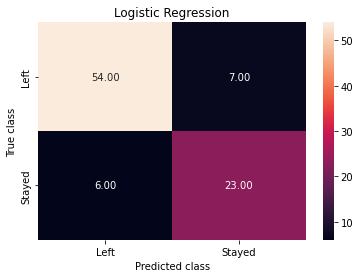

In [35]:
logmodel_y_pred = logmodel.predict(x_test)
logmodel_cm = metrics.confusion_matrix(logmodel_y_pred, y_test)
sns.heatmap(logmodel_cm, annot=True, fmt='.2f',
xticklabels = ["Left", "Stayed"] ,
yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

In [36]:
### KNN classification

In [37]:
# importing all necessary packages in order to perform knn classification technique

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 20)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_heart = KNeighborsClassifier(n_neighbors = 20)
knn_heart.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [41]:
knn_heart_failure = knn_heart.predict(x_test)

In [42]:
# Accuracy score with testing dataset

In [43]:
knn_heart.score(x_test, y_test)

0.6888888888888889

In [44]:
### '''With the above calculation,it is found that whether random state varies from (20 to n times) accuracy level reaches to 68% only
'''Therefore we can conclude that with minimum random state = 20 we can get maximum accuracy.'''

'Therefore we can conclude that with minimum random state = 20 we can get maximum accuracy.'

In [45]:
'''As multiple column dropping techniques have been adopted while designing the model it is found that all the independent variables
are necessary in order to fetch the good results. 
For eg:- I have tried dropping time variable from the table and calculated the accuract score, it gradually diminishes, moreso,
    similarly with other columns as well
    Hence, considering all the variables present in the table we are building the model to get the desired results.'''
    

'As multiple column dropping techniques have been adopted while designing the model it is found that all the independent variables\nare necessary in order to fetch the good results. \nFor eg:- I have tried dropping time variable from the table and calculated the accuract score, it gradually diminishes, moreso,\n    similarly with other columns as well\n    Hence, considering all the variables present in the table we are building the model to get the desired results.'